# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
> - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> - ‘Neighborhood’ indicates the location of the hospital.
> - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> - Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

>- Does age affect the attendance ?
>- Does sms_received affect the attendance ?
>- Does gender affect the attendance ?
>- Does neighbourhood affect the attendance ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 9999

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


   We have to edit columns names and transfer it to lowercase in cleaning step

In [3]:
df.shape

(110527, 14)

  Dataset concist of (110527) rows and (14) columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing value

In [5]:
df.PatientId.nunique()

62299

we have noticed that there are (62299) of (110527) are unique values

In [6]:
df.duplicated().sum()

0

In [7]:
df.PatientId.duplicated().sum()

48228

We have (48228) duplicated rows of PatientId in our dataset

In [8]:
df.duplicated(["PatientId","No-show"]).sum()

38710

We have (38710) PatientIds with duplicated showing state
We have to remove it in cleaning step

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We have note that an invalid input in Age columns that there is no one his age is -1 so we have to remove this row in cleaning step


### Data Cleaning

 

In [10]:
# edit columns names
df.rename(columns=lambda x: x.lower().replace("-", "_"), inplace=True)
df.head(4)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [11]:
# correct hipertension spelling
df.rename(columns={'hipertension':'hypertension'},inplace =True)
df.head(4)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [12]:
# remove invalid values (-1)
rm = df.query('age < 0')
rm

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
# drop invalid values
df.drop(index=99832,inplace=True)

In [14]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
# remove duplicated PatientIds with duplicated showing state
df.drop_duplicates(["patientid","no_show"],inplace=True)
df.shape

(71816, 14)

In [16]:
# remove unnecessary columns
df.drop(["patientid","appointmentid","scheduledday","appointmentday"],axis=1,inplace=True)
df.head(7)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes


 <a id='eda'></a>
## Exploratory Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0aa1f6198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a72fbac8>]], dtype=object)

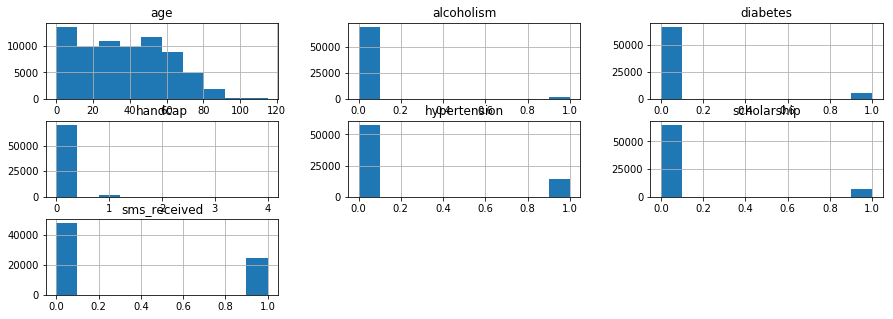

In [17]:
df.hist(figsize=(15,5))

In [18]:
# devide data to two datasets
show = df.query('no_show == "No"')
noshow = df.query('no_show == "Yes"')
show.count(),noshow.count()

(gender           54153
 age              54153
 neighbourhood    54153
 scholarship      54153
 hypertension     54153
 diabetes         54153
 alcoholism       54153
 handcap          54153
 sms_received     54153
 no_show          54153
 dtype: int64, gender           17663
 age              17663
 neighbourhood    17663
 scholarship      17663
 hypertension     17663
 diabetes         17663
 alcoholism       17663
 handcap          17663
 sms_received     17663
 no_show          17663
 dtype: int64)

We have noticed that number of patients that have show up is 3 times grater than patient that have no show up

  ### Does age affect on the attendance ?

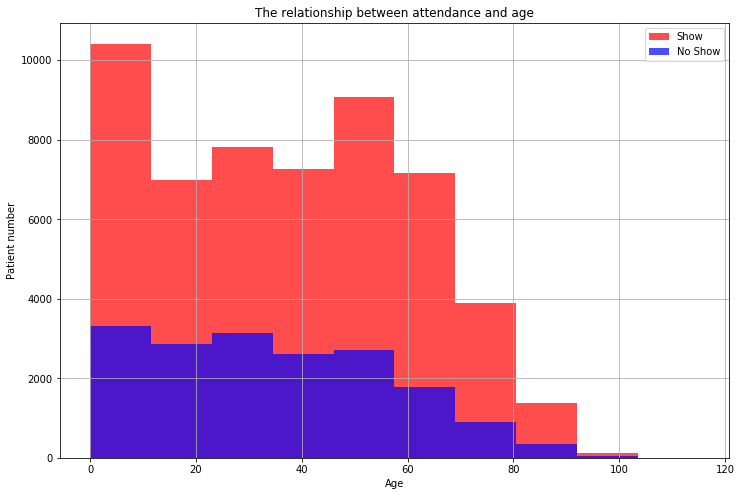

In [24]:
# does age affect on the attendance
def attendance(age):

    show.age.hist(figsize=(12,8),alpha=0.7,color="red",label="Show");
    noshow.age.hist(alpha=0.7,color="blue",label="No Show");
    plt.xlabel("Age")
    plt.ylabel("Patient number")
    plt.title("The relationship between attendance and age")
    plt.legend();
attendance('age')

we have noticed that ages from 0 to 3 and 45 to 60 is the most patient that have showing up and ages from 80 to above is       less showing up

### Does sms_received affect on the attendance ?

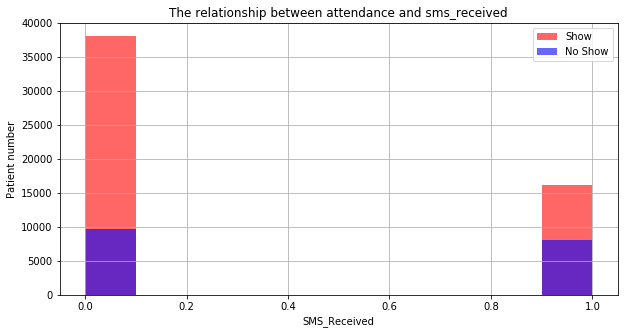

In [20]:
# Does sms_received affect on the attendance ?
show.sms_received.hist(figsize=(10,5),alpha=0.6,color="red",label="Show");
noshow.sms_received.hist(alpha=0.6,color="blue",label="No Show");
plt.xlabel("SMS_Received")
plt.ylabel("Patient number")
plt.title("The relationship between attendance and sms_received")
plt.legend();

We noticed something unexpected, the number of patients who attended and were not recieved messages is greater than the number of patients who attended and were sent recieved messages

### Does gender affect the attendance ?

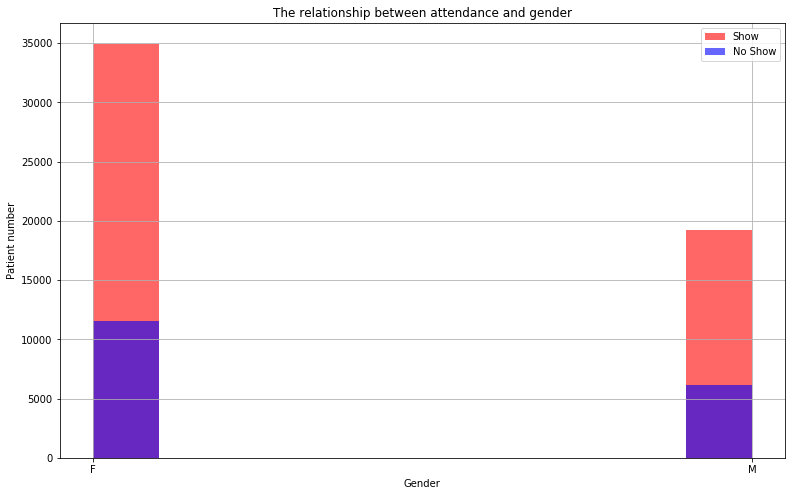

In [21]:
# Does gender affect on the attendance ?
show.gender.hist(figsize=(13,8),alpha=0.6,color="red",label="Show");
noshow.gender.hist(alpha=0.6,color="blue",label="No Show");
plt.xlabel("Gender")
plt.ylabel("Patient number")
plt.title("The relationship between attendance and gender")
plt.legend();

gender has no effect on the attendace

### Does neighbourhood affect the attendance ?

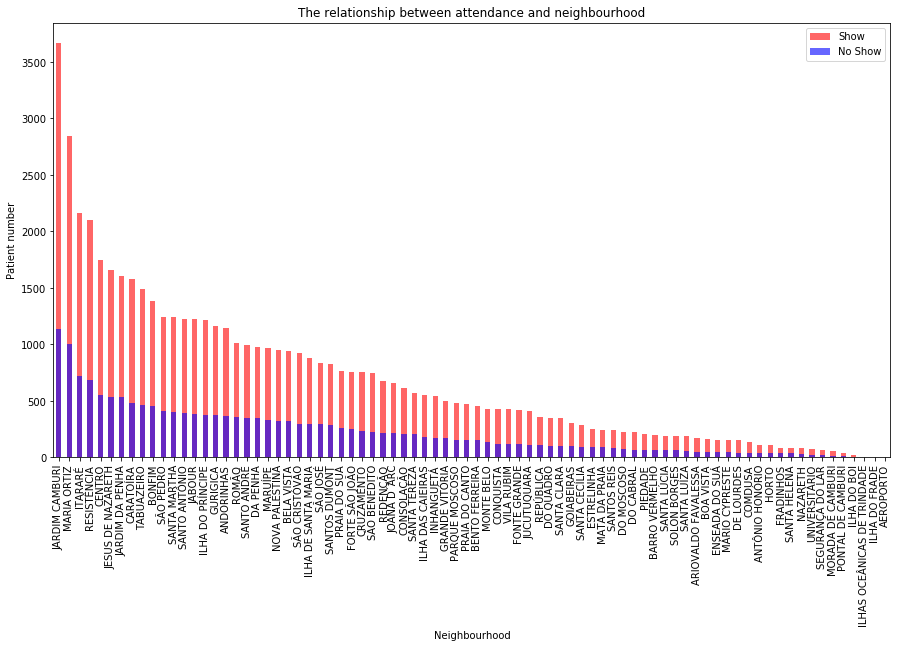

In [22]:
# The relationship between attendance and neighbourhood
plt.figure(figsize=[15,8])
show.neighbourhood.value_counts().plot(kind="bar",alpha=0.6,color="red",label="Show");
noshow.neighbourhood.value_counts().plot(kind="bar",alpha=0.6,color="blue",label="No Show");
plt.xlabel("Neighbourhood")
plt.ylabel("Patient number")
plt.title("The relationship between attendance and neighbourhood")
plt.legend();

Neighbourhood has effect on the attendance 

JARDIM CAAMPURI has the greatest number of patients that have attend and showing up

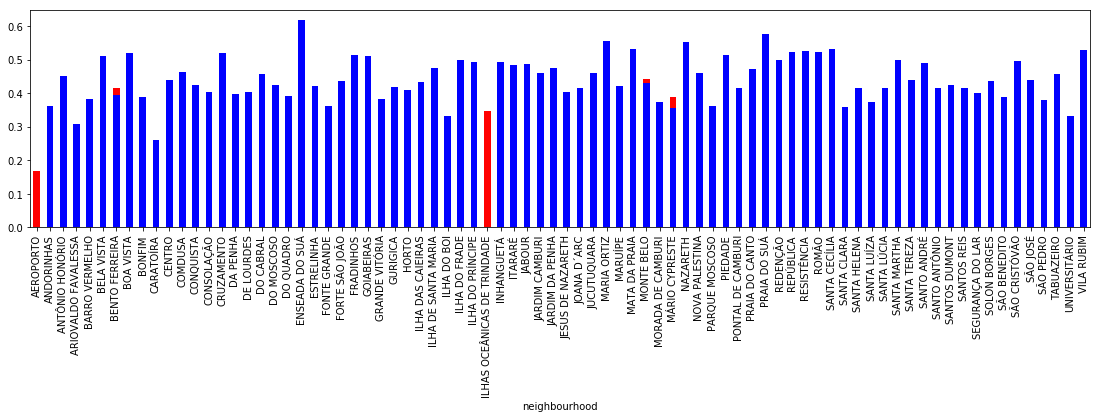

In [23]:
plt.figure(figsize=[19,4])
show.groupby('neighbourhood').sms_received.mean().plot(kind='bar',color='red',label='Show');
noshow.groupby('neighbourhood').sms_received.mean().plot(kind='bar',color='blue',label='No Show');

we have noticed that sms has response in in 5 neighbourhoods 
and there are 2 neighbourhoods (AEROPORTO, ILHAS OCEÂNICAS DE TRINDADE) that all patient who recieved sms thay are attend

<a id='conclusions'></a>
## Conclusions

> - Age has effect on attendance that we have noticed ages from 0 to 3 and 45 to 60 is the most patient that have showing up and ages from 80 to above is less showing up
> - Neighbourhood has strong effect on attendance
> - Sms_received has opposite effect that it seems unexpected , the number of patients who attended and were not recieved messages is greater than the number of patients who attended and were sent recieved messages

## Limitations 
> There is no clear relationship between attendance and ( gender , hypertension , diabetes , alcoholism , handcap )

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0